<a href="https://colab.research.google.com/github/Jaime-Cg-si/DOJO-HYPE/blob/main/Mod_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 **Créditos pelo notebook:** Isabella Morija, Yago Primerano, Ana Clara das Neves Barreto.

# Módulo de Classificação

🎉 Desejamos boas-vindas ao módulo de Classificação!

Neste módulo será apresentada a tarefa de classificar dados em categorias, um dos tipos mais comuns de problemas resolvidos com Machine Learning.

Antes de partir para os exemplos práticos, será feita uma breve revisão dos conceitos essenciais para entender o que é Classificação, como ela funciona e onde é aplicada.

## Revisão: O que é Classificação?

Na Classificação em Aprendizado de Máquina, estamos tentando fazer com que, dadas algumas entradas rotuladas (conjuntos de dados de treinamento), o algoritmo aprenda a identificar (ou prever!) a classe na qual um novo exemplo pertence.

-> A classe que estamos querendo prever é representada pela variável target (também chamada de label, ou rótulo).

Vamos imaginar que você é um sommelier e está avaliando vinhos. Com base na descrição do vinho, no país de origem e no preço, você tenta prever se aquele vinho será “bom” ou “ruim”. Esse tipo de problema, onde a resposta esperada pertence a categorias definidas, é chamado de classificação.


### Exemplos de aplicação
- Dizer se um e-mail é spam ou não é.
- Prever se um cliente vai comprar ou não comprar um produto.
- Detectar se uma imagem contém um cachorro ou um gato.
- Diagnosticar uma doença com base nos sintomas (ex: positivo ou negativo para uma doença).

### Como funciona?
Durante o treinamento, o modelo recebe uma base de dados com variáveis **features** (atributos) e a variável target (label), representante da classe correta para cada exemplo. Ele então aprende padrões que ajudam a identificar a qual classe cada novo exemplo provavelmente pertence.

Por exemplo, se tivermos um conjunto de dados de vinhos com as colunas:

- country: país de origem
- points: nota do vinho
- price: preço

E uma coluna chamada categoria_vinho com valores como “Bom” ou “Ruim”, o modelo de classificação tentará aprender a relação entre os atributos (country, points, price) e a classe (categoria_vinho).

Dependendo do conjunto de dados e (principalmente) do objetivo da modelagem, a classificação pode ser
- Binária: duas classes (ex: spam ou not spam).
- Multiclasse: mais de duas classes (ex: "ruim", "médio" ou "bom").
- Multirrótulo: quando uma instância (entrada) pode pertencer a mais de uma classe ao mesmo tempo.

- problema de classificacao : com base nos dados de treino, o modelo deve ser capaz de agrupar futuros dados em categorias definidas

-----------

A seguir, apresentaremos um modelo de classificação bastante utilizado e relativamente simples.

# Árvores de Decisão

Sugestão de material:
- [O que é uma árvore de decisão? - IBM](https://www.ibm.com/br-pt/think/topics/decision-trees)

- estrutura da arvore de decisao : no raiz, ramifica em nos internos e acaba em nos folhas. Estruturada de maneira a acrescentar o minimo de carga logica possivel, mantendo as decisoes simples.

- Criterios de selecao para nos internos:
1. Ganho de informacao : diferenca nos niveis de entropia antes e depois do estado. Ou seja, quanto maior o ganho de informacao, menor a entropia final
2. Impureza de Gini : quantifica a probabilidade de "errar a classificacao" de uma feature. Quanto menor essa probabilidade, melhor colocar em um no (?)

- pre e pos poda: arvores de decisao tem uma tendencia a overfitting, ja que podem acabar criando nos internos extremamente especificos caso sejam cultivadas de maneira irresponsavel. Pra isso, existe a pre-poda, que se preocupa em cortar o crescimento da arvore quando ha falta de dados, e a pos poda, que elimina subarvores com desfechos inconclusivos.



### Introdução

Imagine que você está jogando um jogo de adivinhação, onde a cada pergunta você se aproxima mais da resposta final. As Árvores de Decisão funcionam exatamente dessa forma, permitindo **classificar dados em categorias através de uma série de constatações simples**.

Percebeu-se que, ao tentar classificar um conjunto de dados (como identificar se um vinho é “Bom” ou “Ruim”), percebemos que muitas vezes fazemos perguntas simples para tomar decisões. Por exemplo, “O preço do vinho é elevado?” ou “A pontuação atribuída está acima de um certo valor?”. As Árvores de Decisão são baseadas nisso, onde a decisão final é o resultado de várias perguntas encadeadas.


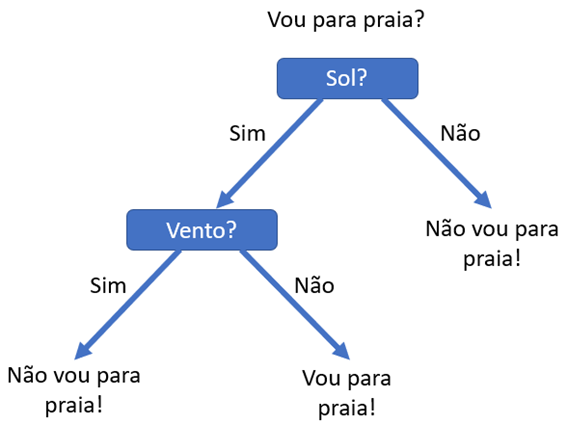

###  Nós da Decisão

Cada **nó** representa uma **pergunta sobre um atributo** dos dados que ajuda a separar as diferentes classes. O objetivo é que, à medida que avançamos pelos nós, cada grupo se torne “puro” – isto é, com os dados pertencentes preferencialmente a uma única classe.


#### Critérios de Divisão

Para entender qual pergunta fazer, utilizamos como critério (é um hiperparâmetro) medidas como a **entropia** e o **índice de Gini**. Em ambos os casos, será verificada a distribuição dos dados nas features de acordo com a variação da variável target.

-> **Entropia:** Mede a incerteza ("bagunça") em relação à variável alvo dentro de um conjunto de dados.

Se houver uma caixa de doces com todas as cores misturadas, a entropia é alta. Se a caixa contiver doces de uma única cor, a entropia é baixa. A entropia é definida por:

  $$
  H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
  $$

  onde \( p_i \) é a proporção de doces (ou dados) da cor (ou classe) \( i \).

Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvore.

O **ganho de informação** é o quanto a variável target pode ser explicada a partir das variáveis feature (a diferença entre a “bagunça” do grupo original e a média de “bagunça” dos grupos resultantes, após a pergunta). A variável com melhor desempenho será a escolhida para iniciar a árvore.

-> Outra forma de medir a pureza dos nós é com o **Índice de Gini**: basicamente, a variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados.

## Vantagens e Desafios

**Vantagens:**
- **Interpretabilidade:** Assim como um mapa de perguntas e respostas, a árvore é fácil de visualizar e entender.  
- **Flexibilidade:** Sem necessidade de pressupor uma forma específica para os dados, ela se adapta a diversos tipos de problema.

**Desafios:**
- **Overfitting (Excesso de Ajuste):** Árvores muito profundas podem “decorar” demais os dados de treinamento, perdendo a capacidade de generalização.  
- **Instabilidade:** Pequenas mudanças nos dados podem levar a árvores com estruturas significativamente diferentes.

## Outros algoritmos de Classificação
Existem diversas famílias de algoritmos de classificação, e cada uma traz consigo um conjunto de hiperparâmetros e armadilhas próprias no que diz respeito a overfitting (quando o modelo “decora” o ruído dos dados) e underfitting (quando o modelo é tão simples que não captura nem os padrões principais). Antes de utilizar, para que aproveitemos a aplicação, é essencial que tenha em mente o funcionamento, falhas e hiperparâmetros em mente.

**Árvores de Decisão**: particionam recursivamente o espaço de atributos em regiões homogêneas, escolhendo em cada nó o atributo e o ponto de corte que maximizam a “pureza” (ex.: ganho de informação ou índice de Gini). São fáceis de interpretar e não exigem escala nos dados, mas árvores profundas tendem a **overfitting** (decoram o ruído), exigindo hiperparâmetros como `max_depth`, `min_samples_leaf` ou poda para controlar a complexidade.


**[Random Forest](https://www.ibm.com/br-pt/think/topics/random-forest#:~:text=Random%20forest%20%C3%A9%20um%20algoritmo,problemas%20de%20classifica%C3%A7%C3%A3o%20e%20regression.)**: é um conjunto (ensemble) de várias árvores de decisão treinadas em **bootstrap samples** e selecionando aleatoriamente subconjuntos de atributos em cada divisão. Esse “bagging” reduz drasticamente a variância e o overfitting de uma única árvore, mantendo boa capacidade de generalização. Hiperparâmetros chave incluem `n_estimators` (quantas árvores), `max_features` (atributos por divisão) e `max_depth`.


**[Naïve Bayes](https://www.ibm.com/br-pt/think/topics/naive-bayes)**: aplica o teorema de Bayes assumindo **independência condicional** entre os atributos dado o rótulo. Há variantes como GaussianNB (para dados contínuos) e MultinomialNB (para contagens). Rápido e simples, costuma underfitar se houver correlações fortes entre atributos, mas funciona muito bem em texto (classificação de documentos) e serve de baseline eficiente. O principal hiperparâmetro é o fator de **Laplace smoothing** (`alpha`).

**[Support Vector Machine (SVM)](https://www.ibm.com/br-pt/think/topics/support-vector-machine#:~:text=funcionam%20as%20SVMs-,O%20que%20s%C3%A3o%20SVMs%3F,em%20um%20espa%C3%A7o%20N%2Ddimensional.)**: busca uma **hiperplano** que maximize a margem entre classes em um espaço possivelmente transformado por um **kernel** (linear, polinomial, RBF etc.). A margem maior tende a menor complexidade e melhor generalização, mas o ajuste de `C` (penalização de violações à margem) e parâmetros do kernel (`gamma`, `degree`) é crucial: valores inadequados podem causar **overfitting** (fronteira excessivamente flexível) ou **underfitting** (margem muito rígida). SVMs podem ser lentas em datasets grandes, mas são poderosas em cenários de média dimensão.  


---------------------------------

# Avaliação - Métricas de Classificação

## Métricas de teste

- Sugestão de material: [Precisão, Recall e F1 Score Em Machine Learning](https://mariofilho.com/precisao-recall-e-f1-score-em-machine-learning/)

Nesta seção faremos uma revisão e aprofundamento do que foi dado no módulo passado.

As métricas de Classificação são diferentes porcentagens que você terá para avaliar o desempenho do modelo. As diferenças que você olhará para decidir qual utilizar são, principalmente:

1. **Custo de erro** - referem-se às consequências associadas a cada tipo de classificação incorreta que um modelo pode cometer. Queremos pensar, a partir do contexto da previsão que estamos lidando, com qual tipo de erro (da Matriz de Confusão) que terá maior impacto negativo. Se estamos prevendo câncer em pessoas, "Falso negativo" é mais preocupante que "Falso positivo".

2. **Balanceamento das classes** (label) - proporção das labels no dataset. Se tivermos dados de pessoas saudáveis (90%) e pessoas com câncer (10%), o modelo poderá simplesmente prever "saudável" para toda entrada que já terá uma métrica de acurácia altíssima. Por isso, durante o treinamento, se a obtenção de proporção semelhante entre as classes não for conveniente (se o dataset for muito pequeno para equilibrarmos bonitinho), daremos mais ênfase a certas métricas.

### Matriz de Confusão
A partir dela, induzimos as métricas.


|                   | **Previsto Positivo**    | **Previsto Negativo**    |
| ----------------- | ------------------------ | ------------------------ |
| **Real Positivo** | Verdadeiro Positivo (TP) | Falso Negativo (FN)      |
| **Real Negativo** | Falso Positivo (FP)      | Verdadeiro Negativo (TN) |


### 1. Acurácia (Accuracy)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Mede a proporção de previsões corretas em relação ao total de exemplos avaliados.
onde TP (True Positives) e TN (True Negatives) são, respectivamente, os casos positivos e negativos corretamente identificados, enquanto FP e FN são os erros de classificação.

Embora seja a métrica mais intuitiva, ela pode esconder falhas importantes quando o conjunto de dados é desbalanceado.

- **O que mede**: Quantos acertos o modelo obteve?  
- **Quando usar**: ideal se as classes estiverem balanceadas e todos os erros tiverem custo semelhante.  
- **Limitação**: pode ser enganosa em datasets desbalanceados (por exemplo, 95% de “negativos” — basta sempre prever “negativo” e já terá 95% de acurácia, mesmo sem aprender nada).


### 2. Precisão (Precision)

$$\text{Precision} = \frac{TP}{TP + FP}$$

Dos que ele previou como positivos, quantos ele acertou?

- **O que mede**: de todas as instâncias que o modelo previu como positivas, qual a fração realmente positiva.  
- **Quando usar**: importante quando o custo de **falsos positivos** (FP) é alto.  
  - *Exemplo*: em um filtro de spam, FP = e-mail legítimo classificado como spam.

### 3. Recall (Sensibilidade)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Conhecido como Taxa de detecção: de todos os exemplos que o modelo poderia detectar, quantos ele realmente conseguiu?

- **O que mede**: de todas as instâncias realmente positivas, qual a fração que o modelo conseguiu “capturar”.  
- **Quando usar**: crítico quando o custo de **falsos negativos** (FN) é alto.  
  - *Exemplo*: em diagnóstico de doença, FN = paciente doente classificado como saudável.


### 4. F1-Score

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Interessante olhar se tanto precisão quanto recall forem igualmente importantes para o problema.

- **O que mede**: média harmônica entre precisão e recall.  
- **Por que média harmônica?** dá mais peso ao valor menor — penaliza modelos que têm alta precisão e baixo recall (ou vice-versa).  
- **Quando usar**: ótimo resumo único quando você quer equilíbrio entre FP e FN, especialmente em cenários desbalanceados.


## Aprofundamento: Avaliando o modelo - ROC e AUC

E se quisermos saber, como varia o equilíbrio entre detectar corretamente casos positivos e evitar falsos alarmes à medida que mudamos nosso critério de decisão?

Artigos sugeridos:

- [AUC e a curva ROC no aprendizado de máquina - Datacamp](https://www.datacamp.com/pt/tutorial/auc)

- [Classificação: ROC e AUC - Google Crash Course](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=pt-br)


Em vez de olhar apenas para um ponto fixo (um limiar escolhido) e ver “quantos acertos” ou “quantos erros” temos, a ROC traça, de forma contínua, como a taxa de verdadeiros positivos (recall) cresce em função da taxa de falsos positivos para todos os possíveis limiares. Com isso, ganhamos uma visão completa de até que ponto nosso modelo é capaz de distinguir boas das más previsões, independentemente de onde decidamos “cortar” a probabilidade — e a área sob essa curva (AUC) sintetiza esse poder de discriminação em um único valor, facilitando comparações objetivas entre diferentes modelos.

- ROC (Receptor operation Characteristc) : mostra a relacao entre os positivos verdadeiros ((TP) - eixo y) e os falsos positivos ((FP) - eixo x)

- AUC (area under curve) : mostra a area abaixo da ROC

- Uma AUC de 0,5 indica que o modelo tem 50% de chance de acertar o positivo mais do que o negativo

---------------------------------

# Exemplo prático Árvore de Decisão (Classificação)

## Predição de Doença Cardíaca.

O projeto desenvolvido a seguir tem como objetivo **prever a presença de doença cardíaca** com base em dados clínicos de pacientes. A análise é baseada em um dataset público disponível no Kaggle, que contém variáveis como idade, nível de colesterol, pressão arterial, entre outras características relevantes.

Vamos divir o projeto em:

1. Exploração e compreensão do conjunto de dados
2. Preparação dos dados para modelagem
3. Construção do modelo (árvore de decisão)
4. Avaliação do modelo (usando validação cruzada)
5. Visualização da árvore final



## Importando bibliotecas e carregando os dados

In [1]:
import kagglehub

# Carregando o dataset através do kaggle
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# Conferindo o caminho salvo
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [2]:
# Imports básicos
import numpy as np
import pandas as pd

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Específicos para modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc

In [8]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploração dos dados

Incialmente vamos verificar a presença de

- valores nulos
- verificar colunas que podem ser constantes
- identificar valores duplicados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Verificamos a presença de dados nulos (nesse caso, não há)

In [9]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


Todas as colunas possuem pelo menos dois possíveis valores de variáveis

In [10]:
df.duplicated().sum()

np.int64(0)

Não há registros duplicados que podem enviesar a análise

## Análise exploratória

In [ ]:
# Identificando tipos, pra fazer uma melhor análise seria melhor converter de object pra string

df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


### Análise das variáveis quantitativas

Aqui extraímos estatísticas básicas para as variáveis numéricas, como média, desvio padrão e quartis. Esses dados ajudam a identificar distribuições assimétricas ou possíveis outliers. O tipo das variáveis também é relevante para decidir como as variáveis deverão ser para ir para o modelo.

#### Estatísticas descritivas

In [13]:
# Selecionando as variáveis numéricas
colunas_int = df.select_dtypes("int64").columns.to_list()
df_int = df[colunas_int]

# Estatísticas básicas das variáveis numéricas
df_int.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### Correlação entre as variáveis

As árvores de decisão não são sensíveis à multicolinearidade, porém, correlações altas podem atrapalhar a interpretabilidade.

Por exemplo, se duas variáveis tem um grau alto de correlação, não é possível saber qual delas levou a determinado resultado.

In [14]:
# Plotando um gráfico de correlação utilizando a biblioteca plotly.express
px.imshow(df_int.corr(),title="Correlação das features: Heat Failure Prediction")

O máximo que atingimos aqui é 0.28, portanto, não há alta correlação entre nenhuma variável.

### Box-Plots

Nessa etapa, os box-plots são bons para detectar outliers.

Porém, pelo fato da árvore de decisão se dar bem com a presença de outliers (modelos que utilizam distância como métrica são bem mais sensíveis, por exemplo), esse passo acaba sendo opcional.

Vamos tentar excluir esses valores mesmo assim para evitar erros de medição ou casos atípicos.

In [15]:
# Identificando outliers

for coluna in colunas_int:
    if coluna != "HeartDisease":
        fig = px.box(df, y=coluna, x="HeartDisease", title=f"Distribuição de {coluna} por presença de Doença Cardíaca")
        fig.show()


Ao observar os boxplots, percebi que a coluna 'FastingBS' apesar de ser int, é binária. Portanto, removi essa coluna da lista de colunas no formato int para prosseguir com a análise.

In [16]:
# Função que calcula os limites superiores e inferiores e filtra os outliers
def remove_outliers(df, colunas):
  df_filtrado = df.copy()
  for coluna in colunas:
    Q1 = df_filtrado[coluna].quantile(0.25)
    Q3 = df_filtrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df_filtrado[(df_filtrado[coluna] >= limite_inferior) & (df_filtrado[coluna] <= limite_superior)]
  return df_filtrado

# Removendo FastingBS
colunas_outliers = [col for col in colunas_int if col != 'FastingBS']

# DataFrame final
df_sem_outliers = remove_outliers(df, colunas_outliers)

In [17]:
df_sem_outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(f"Linhas restantes após remoção de outliers: {df_sem_outliers.shape[0]}")

Linhas restantes após remoção de outliers: 713


O volume de dados caiu 22,3%, dependendo da análise, essa pode não ser a melhor opção (principalmente no caso da árvore, que é considerado um modelo robusto para outliers).

## DataPrep

Nessa etapa, vamos transformar variáveis categóricas em numéricas utilizando **One-Hot Encoding**.

Modelos baseados em árvore, como a Decision Tree, aceitam tanto codificações binárias (One-Hot-Encoding) quanto inteiras (Label Encoding), mas o One-Hot evita a suposição de ordens entre categorias.

Além disso, não é necessário normalizar ou padronizar os dados para esse tipo de modelo.



In [18]:
# Identificando colunas categóricas
colunas_obj = df.select_dtypes("object").columns.to_list()

colunas_obj

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [19]:
# Aplicando o One-Hot-Encoding
features_categ = df[colunas_obj]
df_prep = pd.get_dummies(df, columns=colunas_obj)

df_prep

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [20]:
## Verificando a quantidade de colunas geradas

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

Pronto!! Temos todas as colunas necessárias e sem nenhuma variável do tipo object.

## Modelo


Aqui, começamos a implantar o modelo em si.

Lembrando que fizemos todo o preparo do nosso dataset com base no modelo, porque conhecemos ele (sabemos que é robustos a outliers e não requer normalização dos dados, por exemplo).

In [21]:
# Imports necessários
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [22]:
# Definimos quem é a nossa variável target
target="HeartDisease"

feature_col_arvore=df_prep.columns.to_list()
feature_col_arvore.remove(target)

In [23]:
# Separamos dois dataframes (X e y, que vão conter,
# respectivamente, nossas features e a nossa target)
X=df_prep[feature_col_arvore]
y=df_prep[target]

#### Avaliação

Para ter uma melhor avaliação do modelo, decidimos usar a validação cruzada com 5 folds.

1. A base de dados é divida em 5 subconjuntos (nossos folds)
2. Em cada iteração, 4 folds são usados para treino e 1 para teste
3. O processo é repetido 5 vezes, garantindo que cada amostra seja usada tanto pra treino quanto pra teste.
4. A versão estratificada o K-Fold (usada aqui), garante que a proporção das classes (HeartDisease=0 e HeartDisease=1) seja mantida (MUITO importante para problemas de classificação desbalanceados)


#### Métricas

As métricas utilizadas foram:

- Precisão, recall, f1-score (usando a função classification_report())
- Acurácia ROC AUC


#### Parâmetros

Como parâmetros de um modelo para árvore de decisão, temos as opções mais comum de uso (entropy ou gini).

Nesse caso, optamos por utilizar o parâmetro 'entropy' para a divisão dos nós. Ele é baseado na informação mútua (quanto mais reduz a incerteza, melhor a divisão)


In [24]:
# Array para armazenar a acurácia de cada fold
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=X,y=y)):

    X_train=df_prep.loc[trn_,feature_col_arvore]
    y_train=df_prep.loc[trn_,target]

    X_valid=df_prep.loc[val_,feature_col_arvore]
    y_valid=df_prep.loc[val_,target]

    clf=DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"Fold : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"Acurácia para {fold+1} : {acc}")

Fold : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        82
           1       0.91      0.88      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

Acurácia para 1 : 0.8862984218077475
Fold : 1 : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        82
           1       0.87      0.77      0.82       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184

Acurácia para 2 : 0.8140841702534671
Fold : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        82
           1       0.74      0.97      0.84       102

    accuracy                           0.79       184
   macro avg      

In [25]:
media_acc = np.mean(acc_Dtree)

print(media_acc)

0.7966258031829007


Essa é a média final da acurácia do nosso modelo.

### Visualização da árvore

Por fim, apenas para entender como funciona uma árvore de decisão visualmente, montamos um código que mostra cada uma das divisões feitas (a fim de curiosidade).

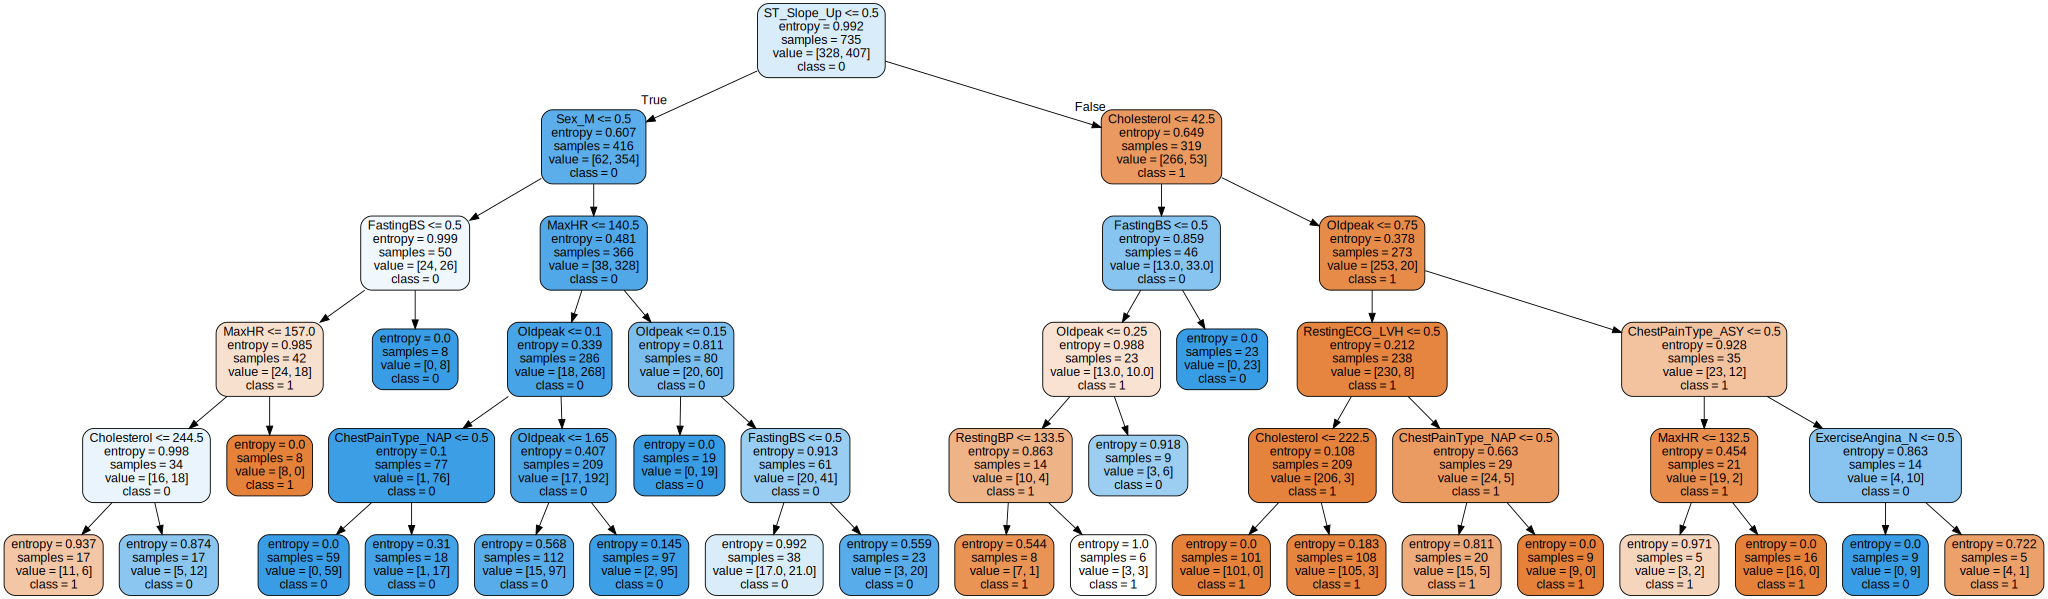

In [26]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_col_arvore,
                                class_names=['1', '0'],
                                filled=True, rounded=True)

# Mostra a árvore
graph = graphviz.Source(dot_data, format="png")
graph

## Matriz de confusão

In [27]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)

In [28]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0])

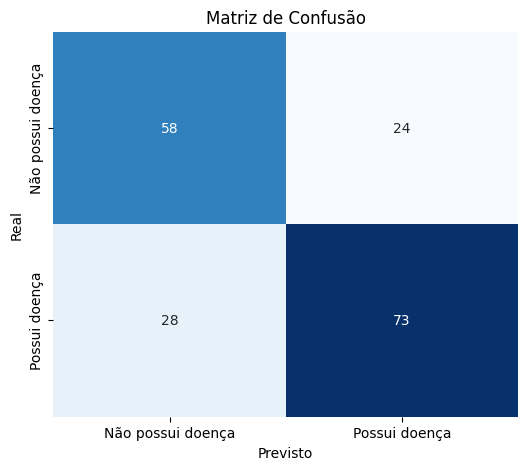

In [29]:
cm = confusion_matrix(y_valid,y_pred,labels=[0,1])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Não possui doença", "Possui doença"],
            yticklabels=["Não possui doença", "Possui doença"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## ROC

As probabilidades na monitoria estavam dando 0. e 1. por conta da altura da árvore, então inseri os parâmetros de max_depth e min_samples_leaf e resolveu :)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # separei os dados pra garantir, mas poderíamos
                                                                                        # ter continuado usando a mesma separação do último loop do K-Fold

In [31]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5)
clf.fit(X_train,y_train)
y_prob=clf.predict_proba(X_val)[:, 1]

In [32]:
y_prob # Agora sim probs legais :)

array([0.        , 0.72222222, 1.        , 1.        , 0.        ,
       0.65517241, 1.        , 0.19354839, 0.62222222, 0.8       ,
       0.62222222, 0.19354839, 0.96666667, 0.        , 0.65517241,
       1.        , 0.19354839, 1.        , 0.65517241, 0.        ,
       0.72222222, 0.65517241, 0.        , 0.62222222, 0.96666667,
       0.65517241, 0.        , 0.72222222, 0.        , 0.        ,
       0.96428571, 0.29032258, 0.16666667, 0.96666667, 0.96666667,
       0.16666667, 0.96666667, 0.        , 0.65517241, 0.62222222,
       0.65517241, 0.62222222, 0.72222222, 0.        , 0.19354839,
       0.62222222, 0.96428571, 0.65517241, 1.        , 0.        ,
       0.        , 0.        , 0.93939394, 0.96666667, 0.3       ,
       0.19354839, 0.58333333, 0.96428571, 1.        , 0.96666667,
       0.        , 0.19354839, 0.        , 0.96428571, 0.4       ,
       1.        , 0.96666667, 0.65517241, 0.96666667, 0.72222222,
       0.        , 0.        , 1.        , 0.72222222, 0.29032

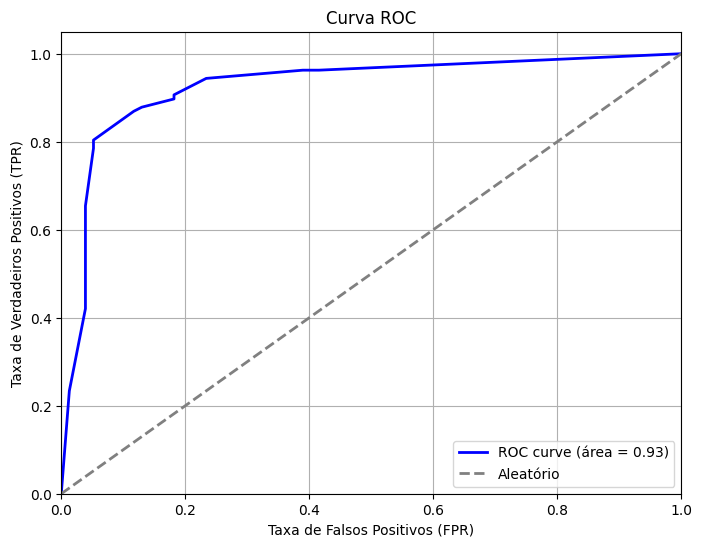

In [33]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# E uma ROC bonita!!

In [34]:
print('AUC: ',roc_auc_score(y_val, y_prob))

AUC:  0.9262653234615851
